In [1]:
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

%matplotlib inline

In [2]:
df = pd.read_csv("datakind_extract_keyfields.csv", low_memory=False)

In [3]:
df.iloc[:10,:10]

,org,city,state,country,org_type,org_subtype,budget,reg date,contact,role
0,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
1,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
2,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
3,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
4,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
5,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
6,100118,"Toledo,",OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
7,100118,Toledo,OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
8,100118,Toledo,OH,US,5,160,80000,2002-06-20 11:59:29.967,28892,26
9,104574,Grand Junction,CO,US,4,121,230000,2002-12-21 09:37:21.817,47146,16


# Filter data by year

In [4]:
df['reg date'] = pd.to_datetime(df['reg date'], format='%Y-%m-%d %H:%M:%S.%f')
soup = df[df['reg date'].apply(lambda x: x.year).isin([2012, 2013, 2014])]

# Wrangle data: convert long to wide and fill by purchase counts

Naturally, the data is sparse

In [5]:
soup_group = pd.crosstab(soup.org, soup.item)
soup_group.iloc[:10,:10]

item,11950880,11950902,11950912,11951016,11951055,11951057,11951146,11951185,11951230,11951248
org,,,,,,,,,,
649419,0,0,0,0,0,0,0,0,0,0
649421,0,0,0,0,0,0,0,0,0,0
649423,0,0,0,0,0,0,0,0,0,0
649428,0,0,0,0,0,0,0,0,0,0
649433,0,0,0,0,0,0,0,0,0,0
649442,0,0,0,0,0,0,0,0,0,0
649467,0,0,0,0,0,0,0,0,0,0
649469,0,0,0,0,0,0,0,0,0,0
649471,0,0,0,0,0,0,0,0,0,0


# EDA: most orgs bought < 15 items between 2012-2014

Consider throwing out items that were rarely purchased, but keep them all for now

In [6]:
total_org_purchases = soup_group.sum(axis=1)
total_org_purchases.sort()

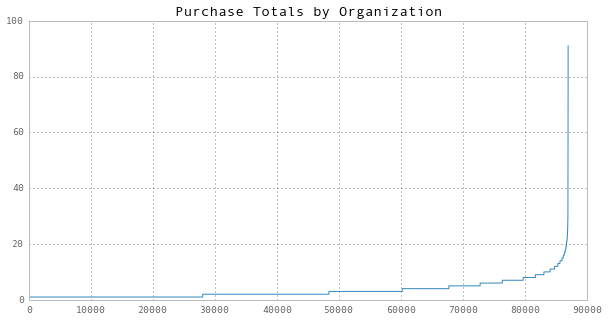

In [7]:
plt.figure(figsize=(10,5))
plt.plot(total_org_purchases)
plt.title("Purchase Totals by Organization")
plt.show()

# Log transform features: counts of purchases for each item

In [8]:
soup_group_log = np.log(soup_group + 1)
soup_group_log.iloc[:10,:10]

item,11950880,11950902,11950912,11951016,11951055,11951057,11951146,11951185,11951230,11951248
org,,,,,,,,,,
649419,0,0,0,0,0,0,0,0,0,0
649421,0,0,0,0,0,0,0,0,0,0
649423,0,0,0,0,0,0,0,0,0,0
649428,0,0,0,0,0,0,0,0,0,0
649433,0,0,0,0,0,0,0,0,0,0
649442,0,0,0,0,0,0,0,0,0,0
649467,0,0,0,0,0,0,0,0,0,0
649469,0,0,0,0,0,0,0,0,0,0
649471,0,0,0,0,0,0,0,0,0,0


# Example: calculate distance function for org_id=649419

Todo: refactor using numpy arrays instead of iterating through pandas dataframe

In [9]:
def calc_distance(df, org_id):
    rows = soup_group_log.index

    dist_euc = []
    dist_man = []
    org_vec = df.loc[org_id]

    for x in rows:
        dist_euc.append([x, float(euclidean_distances(org_vec, df.loc[x]))])
        dist_man.append([x, float(manhattan_distances(org_vec, df.loc[x]))])
    
    return dist_euc, dist_man

In [10]:
dist_euc, dist_man = calc_distance(soup_group_log, org_id=649419)

# Example: return top 100 similar orgs by distance metric

In [11]:
dist_euc_sort = sorted(dist_euc, key=lambda x: x[1])[1:101] # skip first value: comparison to self

# show top 10
dist_euc_sort[:10]

[[660324, 0.9802581434685472],
 [668958, 0.9802581434685472],
 [721071, 0.9802581434685472],
 [726192, 0.9802581434685472],
 [753619, 0.9802581434685472],
 [756159, 0.9802581434685472],
 [828918, 0.9802581434685472],
 [837910, 0.9802581434685472],
 [692702, 1.0608053458243734],
 [782417, 1.135653968259141]]

In [12]:
dist_man_sort = sorted(dist_man, key=lambda x: x[1])[1:101] # skip first value: comparison to self

# show top 10
dist_man_sort[:10]

[[660324, 1.3862943611198906],
 [668958, 1.3862943611198906],
 [721071, 1.3862943611198906],
 [726192, 1.3862943611198906],
 [753619, 1.3862943611198906],
 [756159, 1.3862943611198906],
 [828918, 1.3862943611198906],
 [837910, 1.3862943611198906],
 [692702, 1.791759469228055],
 [649597, 2.0794415416798357]]

In [13]:
def calc_top10_org_weights(df, distance_val, sorted_distance_val):
    max_man_dist = max(zip(*distance_val)[1])

    weight_vector = []

    for x in sorted_distance_val[1:]:
        weight = 1 - x[1]/max_man_dist
        weight_vector.append(weight * df.loc[[x[0]]].values[0])
        
    return weight_vector

In [14]:
weight_vector_euc = calc_top10_org_weights(soup_group_log, dist_man, dist_man_sort)
weight_vector_man = calc_top10_org_weights(soup_group_log, dist_euc, dist_euc_sort)

In [15]:
weights_euc = zip(*weight_vector_euc)
weights_man = zip(*weight_vector_man)

# Example: return all recommended items by distance metric

In [16]:
item_similarity_euc = [(k, sum(v)) for k,v in enumerate(weights_euc) if sum(v) > 0]
item_similarity_man = [(k, sum(v)) for k,v in enumerate(weights_man) if sum(v) > 0]

In [17]:
indices_euc = zip(*item_similarity_euc)[0]
indices_man = zip(*item_similarity_man)[0]

In [18]:
all_recommend_items_euc = set([soup_group_log.columns[i] for i in indices_euc])
all_recommend_items_euc

{17871409,
 23368086,
 34793482,
 35127559,
 39960918,
 39962284,
 44490815,
 45338113,
 45338356,
 46544823,
 47036069,
 56477268}

In [19]:
all_recommend_items_man = set([soup_group_log.columns[i] for i in indices_man])
all_recommend_items_man

{39960918, 39962284, 45338113, 46544823, 47036069}

# Example: return items originally purchased by org

In [20]:
already_purchased_items = set(soup_group.loc[649419][soup_group.loc[649419] > 0].index)
already_purchased_items

{39960918, 39962284, 45338113, 46544823, 47036069}

# Example: return recommended items not already purchased by org, by distance metric

In [21]:
recommend_items_man = list(all_recommend_items_man - already_purchased_items)
recommend_items_man

[]

In [22]:
recommend_items_euc = list(all_recommend_items_euc - already_purchased_items)
recommend_items_euc

[35127559, 34793482, 17871409, 56477268, 23368086, 45338356, 44490815]